In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import pdist, squareform

In [2]:
names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven',
         'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen'] #this creates dummy names for the formations
number_of_layers = 6 #this is the number of tops you want in your training data
smallest = -5
largest = 12
step = 0.2
no_of_neighbors = 20

In [126]:
df =  pd.DataFrame()
locations = pd.DataFrame()
elevation_random = sorted(np.random.uniform(smallest, largest, number_of_layers-1))
for j in np.arange(smallest, largest, step):
    rolling = pd.DataFrame()
    for i in range(len(names[0:number_of_layers-1])):
        basement = 0.001+(10/j)*np.sin(1-np.arange(0,40,0.1)/(j*10)+0.001)
        elevation = np.full(400, j)
        topbasement = np.where(basement > elevation, elevation, basement)
        rolling['zero'] = topbasement
        layer_elevation = 0.001+(10/j)*np.sin(1-np.arange(0,40,0.1)/(j*10)+0.001)+elevation_random[i]
        layer_elevation = np.where(layer_elevation > elevation, elevation, layer_elevation)
        rolling[names[i]] = layer_elevation
    x = np.arange(0,40,0.1)
    y = np.random.randint(0,10,len(x))
    if j%0.2 >0.1:
        rolling['ex'] = x*np.cos(-j/2) - y*np.sin(-j/2)
        rolling['ey'] = y*np.cos(-j/2) - x*np.sin(-j/2)
    else:
        rolling['ex'] = x*np.cos(j/2) - y*np.sin(j/2)
        rolling['ey'] = y*np.cos(j/2) - x*np.sin(j/2)
    for k in range(100):
        rolling.iloc[np.random.randint(0,399), np.random.randint(0,number_of_layers-1)] = 0
    hood = squareform(pdist(rolling.iloc[:, -2:]))
    neighbors = [] 
    for i in enumerate(hood.argsort()[0:,1:no_of_neighbors+1]):
        selected = rolling.iloc[hood.argsort()[i[0],1:no_of_neighbors+1], 0:-2].stack().to_frame().T
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([rolling.iloc[:,:-2], frame], axis=1)
    thicknesses  = neighborhood.diff(axis=1)
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns='zero', inplace=True)
    locations = pd.concat((locations, rolling.iloc[:,-2:]))
    df = pd.concat((df, thicknesses))
logged = df.apply(np.log) #take the log of thicknesses for feature engineering
powered = df.apply(lambda x: x**10) #calculates the power values of thickness for another feature
at = pd.concat([df, logged, powered, locations], axis=1, join_axes=[df.index]
                        ).dropna().replace(-np.inf, 0) 


In [127]:
#NORMALIZING THE DATA
#normalize the data from 0 to 1
normalized_dfa = (at-at.min())/(at.max()-at.min()).replace(0,0.00001)
normalized_locations = (locations-locations.min())/(locations.max()-locations.min())
x = normalized_locations.ex.values
y = normalized_locations.ey.values
normalized_dfa['ex'] = x
normalized_dfa['ey'] = y

In [128]:
df_onlap =  pd.DataFrame()
locations = pd.DataFrame()
for j in np.arange(smallest, largest, step):
    rolling = pd.DataFrame()
    for i in range(len(names[0:number_of_layers-1])):
        basement = 0.001+(10/j)*np.sin(1-np.arange(0,40,0.1)/(j*10)+0.001)
        elevation = np.full(400, j)
        topbasement = np.where(basement > elevation, elevation, basement)
        rolling['zero'] = topbasement
        strat_elevation = np.full(400, elevation_random[i])
        onlap = np.where(strat_elevation > basement, strat_elevation, basement)
        layer_elevation = np.where(onlap > elevation, elevation, onlap)
        rolling[names[i]] = layer_elevation
    x = np.arange(0,40,0.1)
    y = np.random.randint(0,10,len(x))
    if j%0.2 >0.1:
        rolling['ex'] = x*np.cos(-j/2) - y*np.sin(-j/2)
        rolling['ey'] = y*np.cos(-j/2) - x*np.sin(-j/2)
    else:
        rolling['ex'] = x*np.cos(j/2) - y*np.sin(j/2)
        rolling['ey'] = y*np.cos(j/2) - x*np.sin(j/2)
    for k in range(100):
        rolling.iloc[np.random.randint(0,399), np.random.randint(0,number_of_layers-1)] = 0
    hood = squareform(pdist(rolling.iloc[:, -2:]))
    neighbors = [] 
    for i in enumerate(hood.argsort()[0:,1:no_of_neighbors+1]):
        selected = rolling.iloc[hood.argsort()[i[0],1:no_of_neighbors+1], 0:-2].stack().to_frame().T
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([rolling.iloc[:,:-2], frame], axis=1)
    thicknesses  = neighborhood.diff(axis=1)
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns='zero', inplace=True)
    locations = pd.concat((locations, rolling.iloc[:,-2:]))
    df_onlap = pd.concat((df_onlap, thicknesses))
onlaplogged = df_onlap.apply(np.log) #take the log of thicknesses for feature engineering
onlappowered = df_onlap.apply(lambda x: x**10) #calculates the power values of thickness for another feature
ot = pd.concat([df_onlap, onlaplogged, onlappowered, locations], axis=1, join_axes=[df_onlap.index]
                        ).dropna().replace(-np.inf, 0) 

In [129]:
#NORMALIZING THE DATA
#normalize the data from 0 to 1
normalized_dfo = (ot-ot.min())/(ot.max()-ot.min()).replace(0,0.00001)
normalized_locations = (locations-locations.min())/(locations.max()-locations.min())
x = normalized_locations.ex.values
y = normalized_locations.ey.values
normalized_dfo['ex'] = x
normalized_dfo['ey'] = y

In [130]:
df_horizontal =  pd.DataFrame()
locations = pd.DataFrame()
for j in np.arange(smallest, largest, step):
    rolling = pd.DataFrame()
    for i in range(len(names[0:number_of_layers-1])):
        basement = np.full(400, 0)-np.random.rand(400)/100
        elevation = np.full(400, j)
        topbasement = np.where(basement > elevation, elevation, basement)
        rolling['zero'] = topbasement
        strat_elevation = np.full(400, elevation_random[i])
        layer_elevation = np.where(strat_elevation > elevation, elevation, strat_elevation)
        rolling[names[i]] = layer_elevation
    x = np.arange(0,40,0.1)
    y = np.random.randint(0,10,len(x))
    if j%0.2 >0.1:
        rolling['ex'] = x*np.cos(-j/2) - y*np.sin(-j/2)
        rolling['ey'] = y*np.cos(-j/2) - x*np.sin(-j/2)
    else:
        rolling['ex'] = x*np.cos(j/2) - y*np.sin(j/2)
        rolling['ey'] = y*np.cos(j/2) - x*np.sin(j/2)
    for k in range(100):
        rolling.iloc[np.random.randint(0,399), np.random.randint(0,number_of_layers-1)] = 0
    hood = squareform(pdist(rolling.iloc[:, -2:]))
    neighbors = [] 
    for i in enumerate(hood.argsort()[0:,1:no_of_neighbors+1]):
        selected = rolling.iloc[hood.argsort()[i[0],1:no_of_neighbors+1], 0:-2].stack().to_frame().T
        selected.columns = selected.columns.droplevel()
        neighbors.append(selected)
    frame = pd.concat(neighbors, sort=False)
    frame.index = range(len(frame))
    neighborhood = pd.concat([rolling.iloc[:,:-2], frame], axis=1)
    thicknesses  = neighborhood.diff(axis=1)
    thicknesses[thicknesses < 0] = 0
    thicknesses.drop(columns='zero', inplace=True)
    locations = pd.concat((locations, rolling.iloc[:,-2:]))
    df_horizontal = pd.concat((df_horizontal, thicknesses))
horizlogged = df_horizontal.apply(np.log) #take the log of thicknesses for feature engineering
horizpowered = df_horizontal.apply(lambda x: x**10) #calculates the power values of thickness for another feature
hs = pd.concat([df_horizontal, horizlogged, horizpowered, locations], axis=1, join_axes=[df_horizontal.index]
                        ).dropna().replace(-np.inf, 0) 

In [131]:
#NORMALIZING THE DATA
#normalize the data from 0 to 1
normalized_dfh = (hs-hs.min())/(hs.max()-hs.min()).replace(0,0.00001)
normalized_locations = (locations-locations.min())/(locations.max()-locations.min())
x = normalized_locations.ex.values
y = normalized_locations.ey.values
normalized_dfh['ex'] = x
normalized_dfh['ey'] = y

In [132]:
#now assign classes to the datasets, 1 is onlap, 0 is angular unconformity
normalized_dfa['class'] = 0
normalized_dfo['class'] = 1
normalized_dfh['class'] = 2

In [24]:
#dataset = pd.concat((normalized_dfa, normalized_dfo, normalized_dfh))
#dataset.to_csv(r'D:\jupyter\6layers20neighbors.csv')
dataset = pd.read_csv(r'D:\jupyter\4layers20neighbors.csv', index_col=[0])

In [25]:
from sklearn.model_selection import train_test_split
#next let's split our toy data into training and test sets, choose how much with test_size of the data becomes the test set
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[0:, 0:-1].values, dataset.iloc[0:,-1].values, 
                                                    test_size=0.1, random_state=86)

In [5]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train) #this converts the target variable to one-hot encoding
y_test_encoded = to_categorical(y_test) #same with the test data conversion to one-hot encoding

Using TensorFlow backend.


In [6]:
#Import keras and some layers, we are going to build a network with two dense layers and a dropout layer
from keras.models import Sequential
from keras.layers import Dense, Dropout
#this is the network, we initialize with a dense layer and a relu activation
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.1)) #dropout to avoid overfitting
model.add(Dense(1000, kernel_initializer='random_uniform', bias_initializer='zeros', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, kernel_initializer='random_uniform', activation='sigmoid')) #and another dense layer with sigmoid activation

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy']) 
#builds the model, with categorical crossentropy for our loss function, optimizing using nadam, and using categorical accuracy
#as our accuracy metric

In [9]:
model.fit(X_train, y_train_encoded, epochs=1, batch_size=32, verbose=1, validation_split=0.2) #, callbacks=[tbCallBack]) #Fitting the model for 60 epochs and batch size of 32

Train on 73440 samples, validate on 18360 samples
Epoch 1/1
73440/73440 [==============================] - 5s 71us/step - loss: 0.0239 - categorical_accuracy: 0.9947 - val_loss: 1.9077e-05 - val_categorical_accuracy: 1.0000


10200/10200 [==============================] - 0s 17us/step


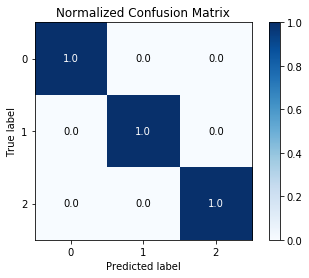

In [10]:
score=model.evaluate(X_test, y_test_encoded) #tests the model on the test data
preds = model.predict(X_test) #creates predictions on the test data that we can use
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, np.argmax(preds, axis=1), normalize=True) #let's visualize the predictions

# Real World Data

In [26]:
#let's import some real world data from southwestern Wyoming
#this is from the Ro`ck Springs Uplift in Wyoming and has been interpreted as an angular unconformity
tops_api = pd.read_csv(r'D:\jupyter\EarlyWSGS\ftunion.csv').fillna(0) #this file is available in the unconformity or onlap folder in the repo
#tops = tops_api[['Kfh','Klz','Kll', 'Klr', 'Kl', 'x', 'y']] # for all Cretaceous
tops = tops_api[['Kl', 'Tfc','Tfob', 'Tfu', 'x', 'y']] #tertiary units
#tops = tops_api[['Kfh', 'Klz', 'Kll', 'Kl', 'Tfc', 'Tfob', 'Tfu', 'x', 'y']] #for all Cretaceous and Tertiary
locations = pd.DataFrame()

In [27]:
hood = squareform(pdist(tops.iloc[:, -2:]))
neighbors = []
for i in enumerate(hood.argsort()[0:,1:no_of_neighbors+1]):
    selected = tops.iloc[hood.argsort()[i[0],1:no_of_neighbors+1], 0:-2].stack().to_frame().T
    selected.columns = selected.columns.droplevel()
    neighbors.append(selected)
frame = pd.concat(neighbors, sort=False)
frame.index = range(len(frame))
neighborhood = pd.concat([tops.iloc[:,:-2], frame], axis=1)
thicknesses  = neighborhood.diff(axis=1)*-1
thicknesses[thicknesses < 0] = 0
thicknesses.drop(columns=tops.columns[0], inplace=True)
thicknesses[thicknesses < 0] = 0
thicknesses[thicknesses>3000] = 0
locations = tops[['x','y']]
real_world_log = thicknesses.apply(np.log) #take the log of thicknesses for feature engineering
real_world_pow = thicknesses.apply(lambda x: x**10) #calculates the power values of thickness for another feature
rw = pd.concat([thicknesses, real_world_log, real_world_pow, locations], axis=1, join_axes=[thicknesses.index]
                        ).dropna().replace(-np.inf, 0)
normalized_rw=(rw-rw.min())/(rw.max()-rw.min()).replace(0,0.00001) #normalize the data from 0 to 1
real_data = normalized_rw.values

In [13]:
well_preds = model.predict(real_data) #make some predictions

(array([439.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0., 448.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

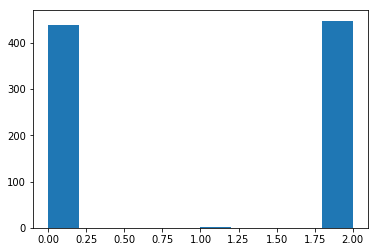

In [14]:
predictions = np.argmax(well_preds, axis=1) #convert them to our binary classification
plt.hist(predictions, label = ['Angular Unconformity', 'Onlap']) #visualize the predictions as a histogram, we are expecting all the wells to be classified as '0'


Text(0.5,1,'Neural Net Predictions')

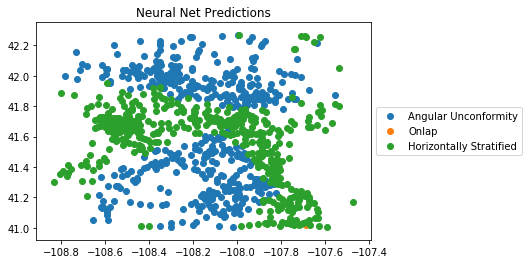

In [15]:
tops_api['predictions'] = predictions
well_locs = pd.read_csv(r'D:\jupyter\EarlyWSGS\well_locations.csv', encoding = "ISO-8859-1")
merged = pd.merge(tops_api, well_locs, on='API')
plt.scatter(merged[merged['predictions']==0].LON, merged[merged['predictions']==0].LAT, label='Angular Unconformity')
plt.scatter(merged[merged['predictions']==1].LON, merged[merged['predictions']==1].LAT, label='Onlap')
plt.scatter(merged[merged['predictions']==2].LON, merged[merged['predictions']==2].LAT, label='Horizontally Stratified')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Neural Net Predictions')

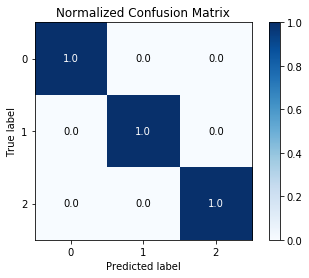

In [16]:
skplt.metrics.plot_confusion_matrix(y_test, np.argmax(preds, axis=1), normalize=True) #let's visualize the predictions

# SVM classifier for a baseline on training

In [17]:
from sklearn.svm import SVC
clf = SVC(C=1, kernel='linear', gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'SVC Predictions')

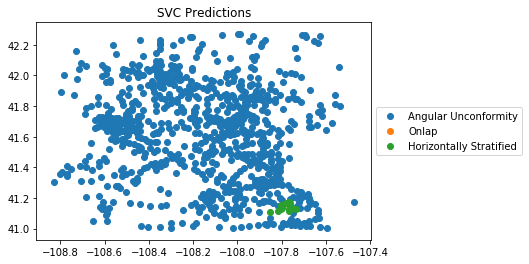

In [18]:
well_preds = clf.predict(real_data)
tops_api['predictionsvm'] = well_preds
well_locs = pd.read_csv(r'D:\jupyter\EarlyWSGS\well_locations.csv', encoding = "ISO-8859-1")
merged = pd.merge(tops_api, well_locs, on='API')
plt.scatter(merged[merged['predictionsvm']==0].LON, merged[merged['predictionsvm']==0].LAT, label='Angular Unconformity')
plt.scatter(merged[merged['predictionsvm']==1].LON, merged[merged['predictionsvm']==1].LAT, label='Onlap')
plt.scatter(merged[merged['predictionsvm']==2].LON, merged[merged['predictionsvm']==2].LAT, label='Horizontally Stratified')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('SVC Predictions')

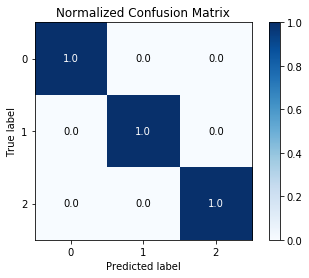

In [19]:
y_est = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_est, normalize=True) #let's visualize the predictions

In [20]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

Text(0.5,1,'Linear SVC Predictions')

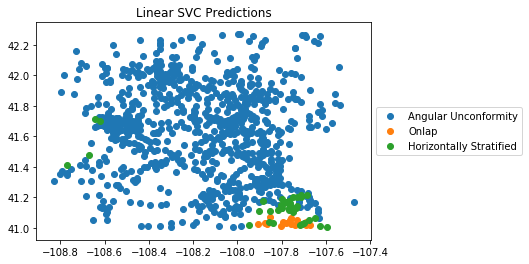

In [21]:
well_preds = clf.predict(real_data)
tops_api['predictionsvm'] = well_preds
well_locs = pd.read_csv(r'D:\jupyter\EarlyWSGS\well_locations.csv', encoding = "ISO-8859-1")
merged = pd.merge(tops_api, well_locs, on='API')
plt.scatter(merged[merged['predictionsvm']==0].LON, merged[merged['predictionsvm']==0].LAT, label='Angular Unconformity')
plt.scatter(merged[merged['predictionsvm']==1].LON, merged[merged['predictionsvm']==1].LAT, label='Onlap')
plt.scatter(merged[merged['predictionsvm']==2].LON, merged[merged['predictionsvm']==2].LAT, label='Horizontally Stratified')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Linear SVC Predictions')

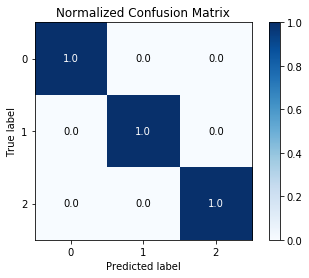

In [22]:
y_est = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_est, normalize=True) #let's visualize the predictions

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import neighbors
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

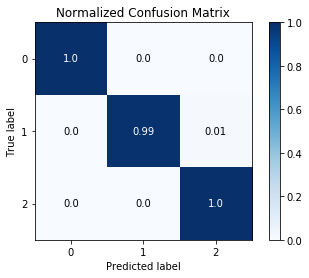

In [29]:
import scikitplot as skplt
y_est = neigh.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_est, normalize=True) #let's visualize the predictions

Text(0.5,1,'KNeighbor Predictions')

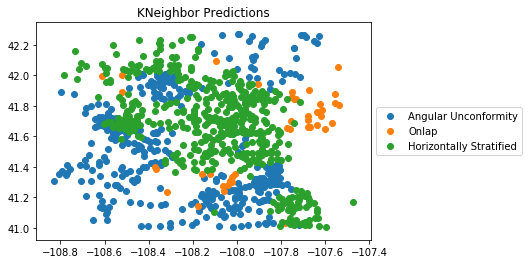

In [30]:
well_preds = neigh.predict(real_data)
tops_api['predictionknc'] = well_preds
well_locs = pd.read_csv(r'D:\jupyter\EarlyWSGS\well_locations.csv', encoding = "ISO-8859-1")
merged = pd.merge(tops_api, well_locs, on='API')
plt.scatter(merged[merged['predictionknc']==0].LON, merged[merged['predictionknc']==0].LAT, label='Angular Unconformity')
plt.scatter(merged[merged['predictionknc']==1].LON, merged[merged['predictionknc']==1].LAT, label='Onlap')
plt.scatter(merged[merged['predictionknc']==2].LON, merged[merged['predictionknc']==2].LAT, label='Horizontally Stratified')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('KNeighbor Predictions')

In [16]:
import verde as vd

stations = pd.read_csv(r'D:\gravitystations.csv', encoding = "ISO-8859-1")
wyoming  = stations[stations['latitude']>=41]
spline = vd.Spline()
spline.fit((wyoming['longitude'], wyoming['latitude']), wyoming['complete_bouger'])


Spline(damping=None, engine='auto',
    force_coords=(array([-109.15   , -109.1385 , ..., -110.6855 , -110.71933]), array([42.15717, 42.14133, ..., 41.35467, 41.31583])),
    mindist=1e-05)

(-109, -107)

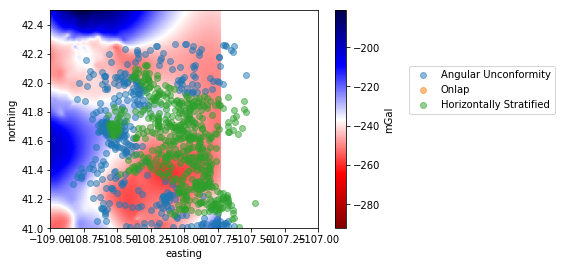

In [17]:
grid = spline.grid(spacing=0.005,data_names=["mGal"])
grid.mGal.plot.pcolormesh(cmap="seismic_r")
plt.scatter(merged[merged['predictionknc']==0].LON, merged[merged['predictionknc']==0].LAT, label='Angular Unconformity', alpha=0.5)
plt.scatter(merged[merged['predictionknc']==1].LON, merged[merged['predictionknc']==1].LAT, label='Onlap', alpha=0.5)
plt.scatter(merged[merged['predictionknc']==2].LON, merged[merged['predictionknc']==2].LAT, label='Horizontally Stratified', alpha=0.5)
plt.legend(loc='lower left', bbox_to_anchor=(1.32, 0.5))
plt.xlim(-109,-107)

In [ ]:
tops_api.head()